# Credit Risk Analysis of loan Amount

### Problem statement: 

__To determine A person’s creditworthiness with the likelihood they may default on loans. <br>
0 = Low credit risk i.e high chance of paying back the loan amount<br>
1 = High credit risk i.e low chance of paying back the loan amount__

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',26)

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

from sklearn.svm import SVC
from xgboost import XGBClassifier

## Loading Data

__data1__ is client details dataset, __data2__ is loan details dataset, __data__ is merged dataset and __Final_data__ is label encoded dataset

In [2]:
data1=pd.read_csv("applicant.csv")
data1.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [3]:
data1.isna().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64

In [4]:
data1.shape

(1000, 15)

In [5]:
data2=pd.read_csv("loan.csv")
data2.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


## EDA

In [6]:
data2.isna().sum()

loan_application_id                              0
applicant_id                                     0
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Other_EMI_plans                                814
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant                              0
dtype: int64

In [7]:
data2.shape

(1000, 13)

In [8]:
data1.shape

(1000, 15)

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [10]:
for i in data1.columns:
    print(data1[i].value_counts())

1469590    1
1554792    1
1439887    1
1237671    1
1352279    1
1409197    1
1448066    1
1337177    1
1199661    1
1483329    1
1401525    1
1869013    1
1611783    1
1837760    1
1844813    1
1771489    1
1168468    1
1241112    1
1770970    1
1373246    1
1509620    1
1142576    1
1671068    1
1538199    1
1482554    1
1516876    1
1586174    1
1168229    1
1441925    1
1662345    1
1680877    1
1504819    1
1654707    1
1764381    1
1391760    1
1883131    1
1679090    1
1784512    1
1326708    1
1443796    1
1862135    1
1432788    1
1707666    1
1349046    1
1640552    1
1532989    1
1300927    1
1684799    1
1736925    1
1156429    1
1495594    1
1732994    1
1532977    1
1452733    1
1304536    1
1892638    1
1175174    1
1360939    1
1637887    1
1126684    1
1476071    1
1649933    1
1875015    1
1203873    1
1221330    1
1619368    1
1133947    1
1169619    1
1215207    1
1349113    1
1188964    1
1695402    1
1183707    1
1216943    1
1782832    1
1892474    1
1652800    1

In [11]:
data1.corr()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker
applicant_id,1.000000,-0.010583,0.017048,-0.028017,0.066389
Primary_applicant_age_in_years,-0.010583,1.000000,0.118201,0.266419,0.006151
Number_of_dependents,0.017048,0.118201,1.000000,0.042643,-0.077071
Years_at_current_residence,-0.028017,0.266419,0.042643,1.000000,0.054097
Foreign_worker,0.066389,0.006151,-0.077071,0.054097,1.000000


### Dropping columns 

In [12]:
data1=data1.drop(['Telephone','Balance_in_existing_bank_account_(lower_limit_of_bucket)'],1)
data1.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,1,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,Low,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,Low,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,Low,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,Low,0


In [13]:
data1.isna().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64

### Handling Missing Values

In [14]:
data1['Has_been_employed_for_at_least'].fillna(data1['Has_been_employed_for_at_least'].mode()[0],inplace=True)
data1['Has_been_employed_for_at_most'].fillna(data1['Has_been_employed_for_at_most'].mode()[0],inplace=True)
data1['Savings_account_balance'].fillna(data1['Savings_account_balance'].mode()[0],inplace=True)
data1['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].fillna(data1['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].mode()[0],inplace=True)

In [15]:
data2.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [16]:
data2.drop(['loan_application_id','Other_EMI_plans'],axis=1,inplace=True)

In [17]:
for i in data2.columns:
    print(data2[i].value_counts())

1469590    1
1554792    1
1439887    1
1237671    1
1352279    1
1409197    1
1448066    1
1337177    1
1199661    1
1483329    1
1401525    1
1869013    1
1611783    1
1837760    1
1844813    1
1771489    1
1168468    1
1241112    1
1770970    1
1373246    1
1509620    1
1142576    1
1671068    1
1538199    1
1482554    1
1516876    1
1586174    1
1168229    1
1441925    1
1662345    1
1680877    1
1504819    1
1654707    1
1764381    1
1391760    1
1883131    1
1679090    1
1784512    1
1326708    1
1443796    1
1862135    1
1432788    1
1707666    1
1349046    1
1640552    1
1532989    1
1300927    1
1684799    1
1736925    1
1156429    1
1495594    1
1732994    1
1532977    1
1452733    1
1304536    1
1892638    1
1175174    1
1360939    1
1637887    1
1126684    1
1476071    1
1649933    1
1875015    1
1203873    1
1221330    1
1619368    1
1133947    1
1169619    1
1215207    1
1349113    1
1188964    1
1695402    1
1183707    1
1216943    1
1782832    1
1892474    1
1652800    1

In [18]:
data2.head()

,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,1203873,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,1432761,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,1674436,24,new vehicle,4870000,3,NaN,0,0,2,delay in paying off loans in the past,1


In [19]:
data2.isna().sum()

applicant_id                                     0
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant                              0
dtype: int64

### Handling missing values and merging datasets

In [20]:
data2['Purpose'].fillna(data2['Purpose'].mode()[0],inplace=True)
data2['Property'].fillna(data2['Property'].mode()[0],inplace=True)

In [21]:
data=pd.merge(data1,data2,on='applicant_id')

In [22]:
data.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,4 years,1,Low,0,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,Low,2 lac,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,Low,0,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,Low,0,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,Low,0,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,1


In [23]:
data.shape

(1000, 23)

### Visualizing missing value

<AxesSubplot:>

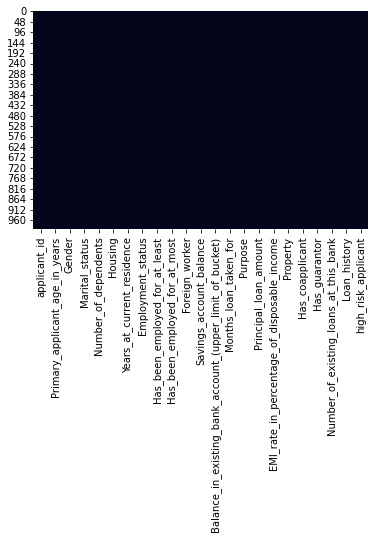

In [24]:
sns.heatmap(data.isnull(), cbar=False)

### Univariate and Bivariate analysis

<AxesSubplot:xlabel='high_risk_applicant', ylabel='count'>

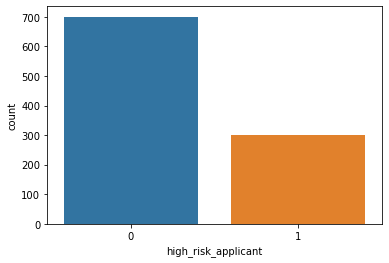

In [25]:
sns.countplot(data['high_risk_applicant'],data=data)

In [26]:
data['high_risk_applicant'].value_counts()

0    700
1    300
Name: high_risk_applicant, dtype: int64

__Out of 1000 people 300 are in high credit risk__

### Correlation of features

<AxesSubplot:>

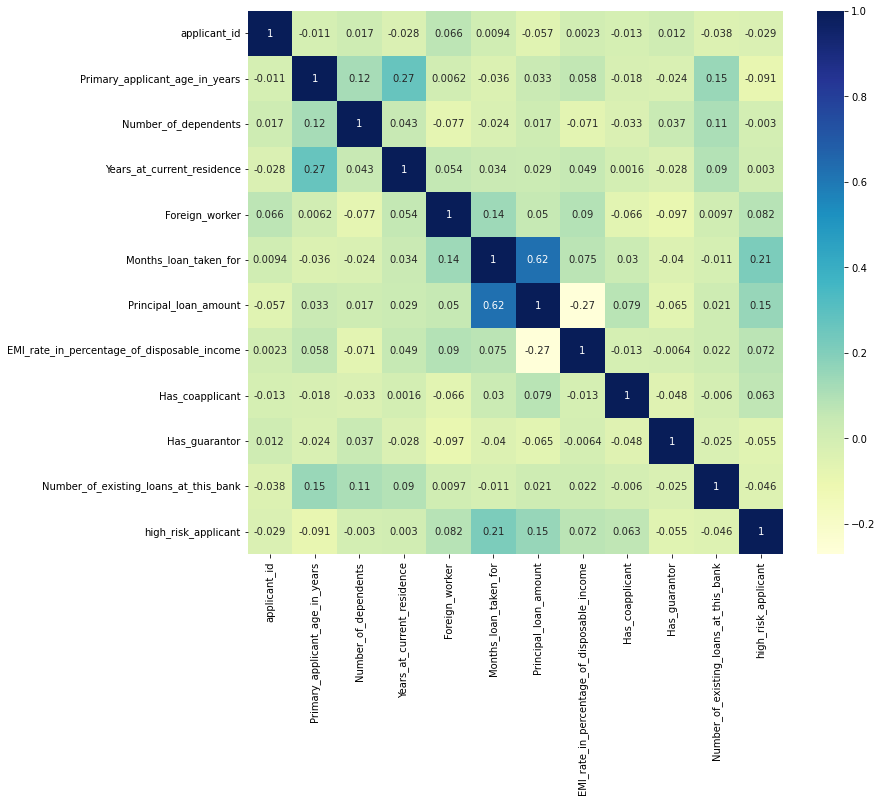

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='Gender', ylabel='Primary_applicant_age_in_years'>

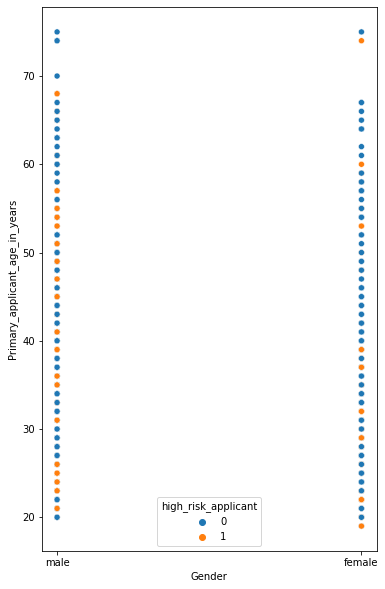

In [28]:
plt.figure(figsize=(6,10))
sns.scatterplot(x='Gender',y='Primary_applicant_age_in_years',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Number_of_dependents', ylabel='Housing'>

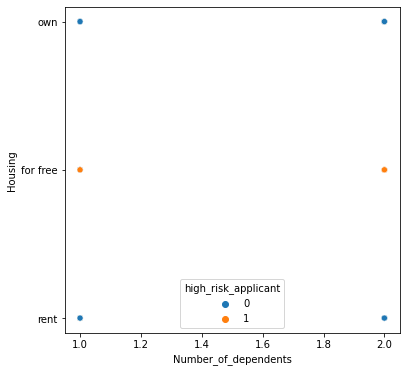

In [29]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Number_of_dependents',y='Housing',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Number_of_existing_loans_at_this_bank', ylabel='Loan_history'>

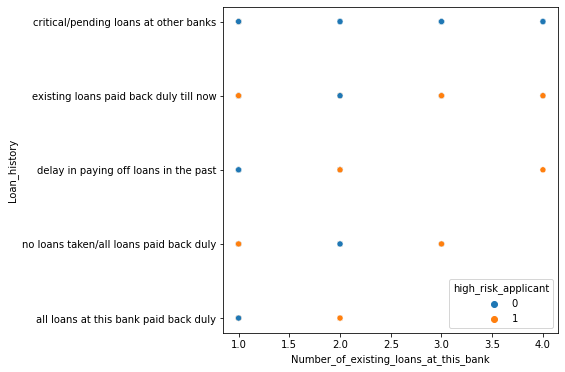

In [30]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Number_of_existing_loans_at_this_bank',y='Loan_history',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Principal_loan_amount', ylabel='Gender'>

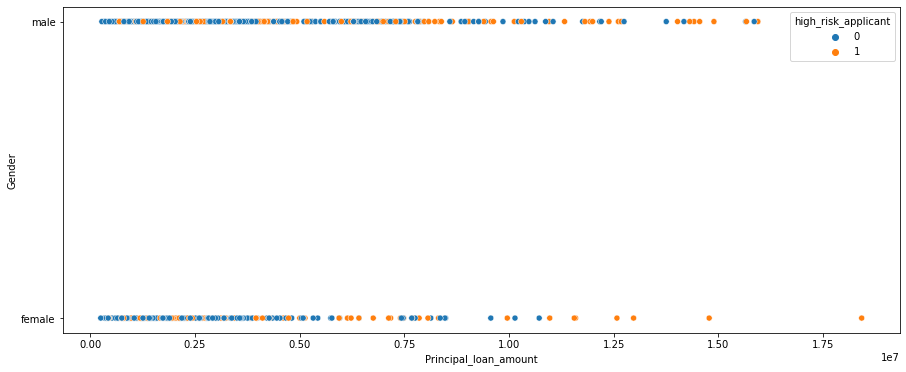

In [31]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Principal_loan_amount',y='Gender',hue='high_risk_applicant',data=data)

__category male has high risk factor__

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

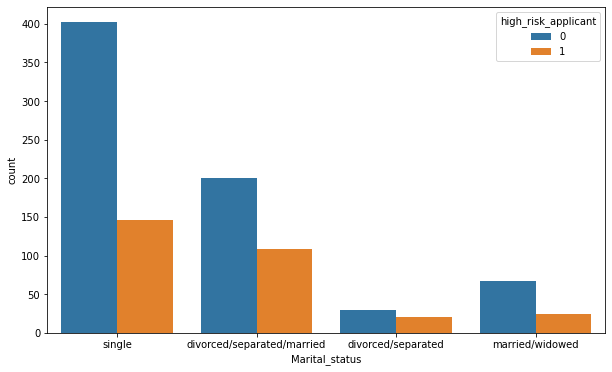

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='Marital_status',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Number_of_dependents', ylabel='count'>

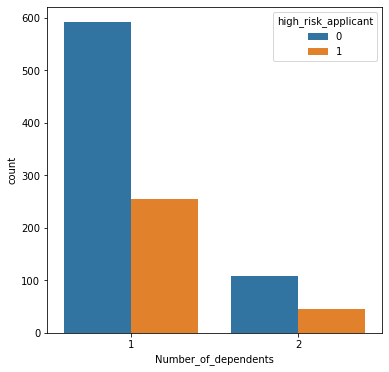

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x='Number_of_dependents',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Housing', ylabel='count'>

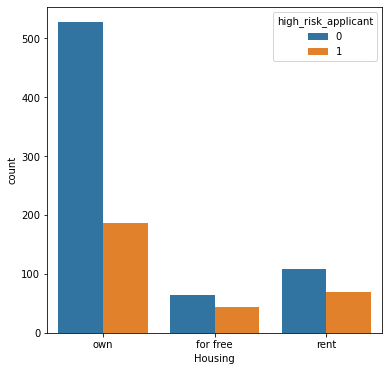

In [34]:
plt.figure(figsize=(6,6))
sns.countplot(x='Housing',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Property', ylabel='count'>

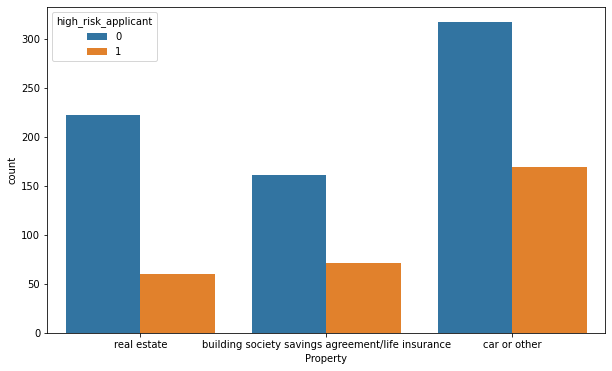

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='Property',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Purpose', ylabel='count'>

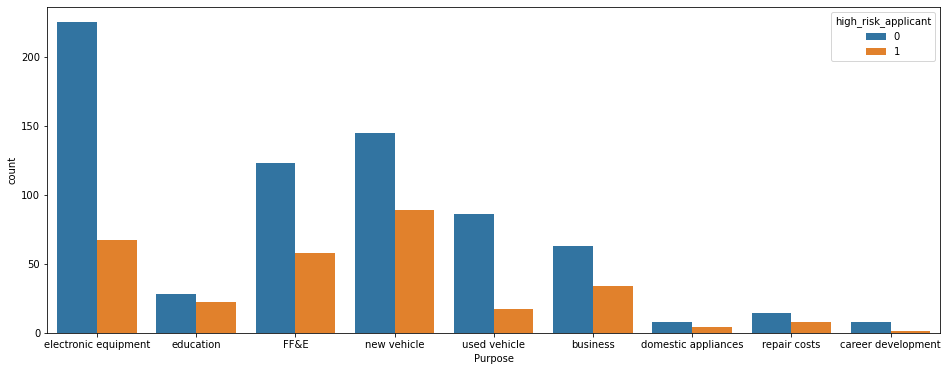

In [36]:
plt.figure(figsize=(16,6))
sns.countplot(x='Purpose',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Months_loan_taken_for', ylabel='count'>

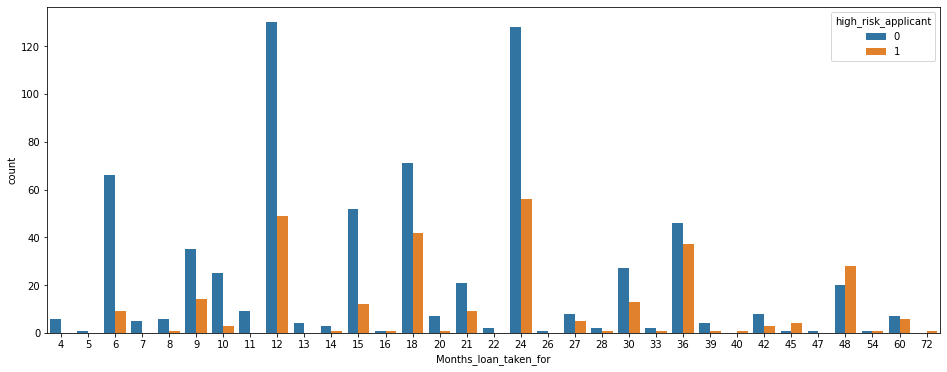

In [37]:
plt.figure(figsize=(16,6))
sns.countplot(x='Months_loan_taken_for',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='EMI_rate_in_percentage_of_disposable_income', ylabel='count'>

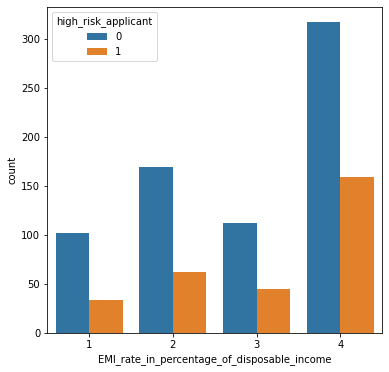

In [38]:
plt.figure(figsize=(6,6))
sns.countplot(x='EMI_rate_in_percentage_of_disposable_income',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Number_of_existing_loans_at_this_bank', ylabel='count'>

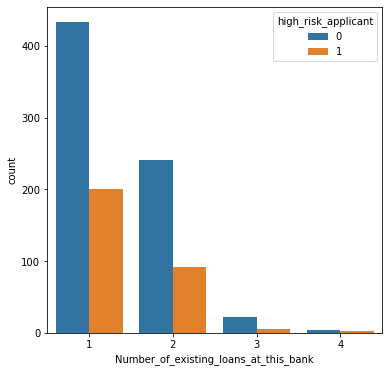

In [39]:
plt.figure(figsize=(6,6))
sns.countplot(x='Number_of_existing_loans_at_this_bank',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Employment_status', ylabel='count'>

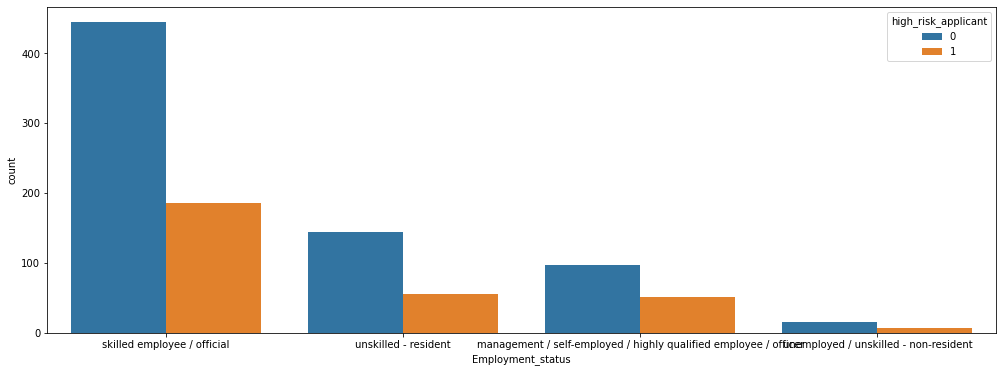

In [40]:
plt.figure(figsize=(17,6))
sns.countplot(x='Employment_status',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Loan_history', ylabel='count'>

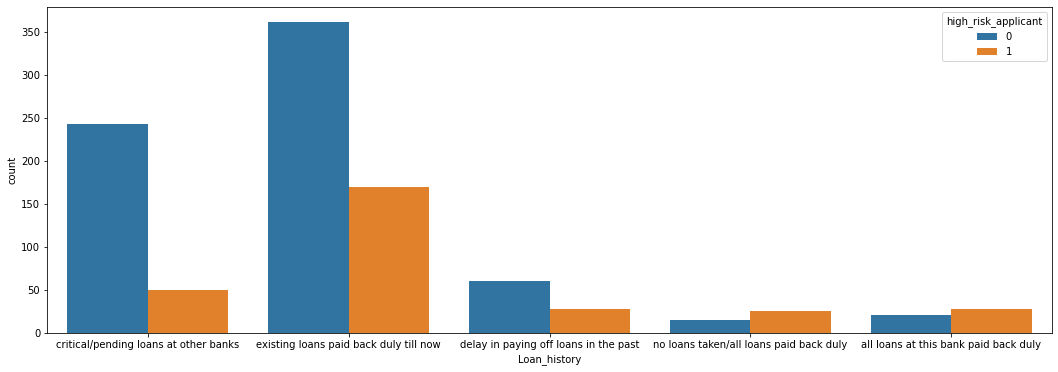

In [41]:
plt.figure(figsize=(18,6))
sns.countplot(x='Loan_history',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Has_coapplicant', ylabel='count'>

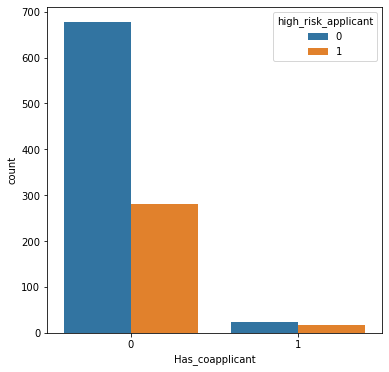

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(x='Has_coapplicant',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Has_guarantor', ylabel='count'>

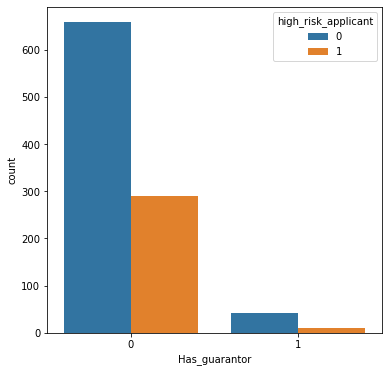

In [43]:
plt.figure(figsize=(6,6))
sns.countplot(x='Has_guarantor',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Foreign_worker', ylabel='count'>

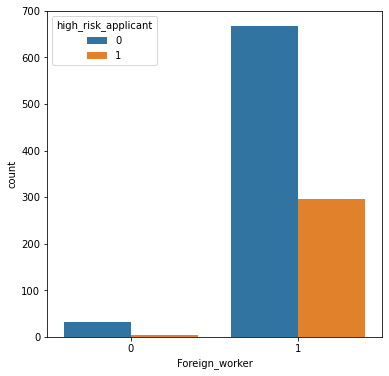

In [44]:
plt.figure(figsize=(6,6))
sns.countplot(x='Foreign_worker',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Primary_applicant_age_in_years', ylabel='count'>

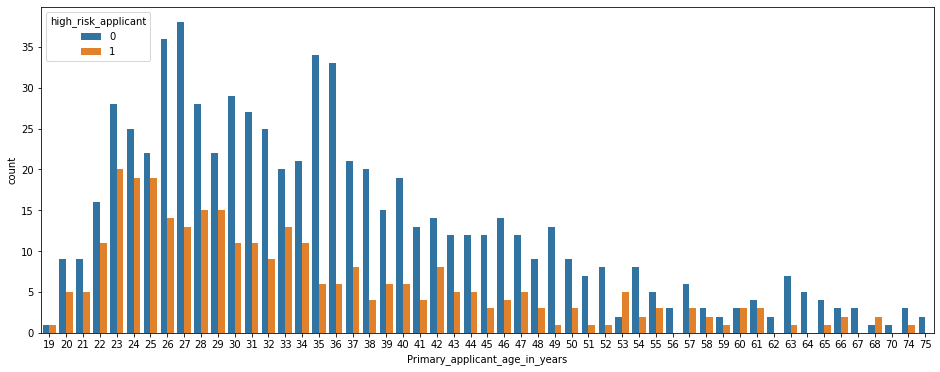

In [45]:
plt.figure(figsize=(16,6))
sns.countplot(x='Primary_applicant_age_in_years',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Years_at_current_residence', ylabel='count'>

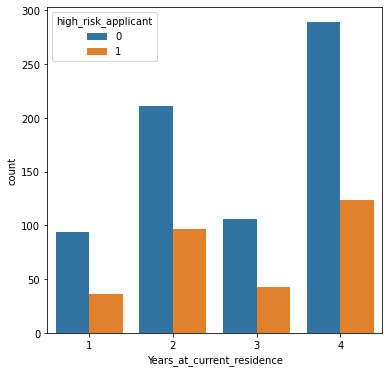

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(x='Years_at_current_residence',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Has_been_employed_for_at_least', ylabel='count'>

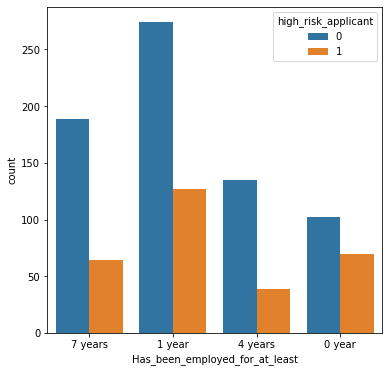

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(x='Has_been_employed_for_at_least',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Has_been_employed_for_at_most', ylabel='count'>

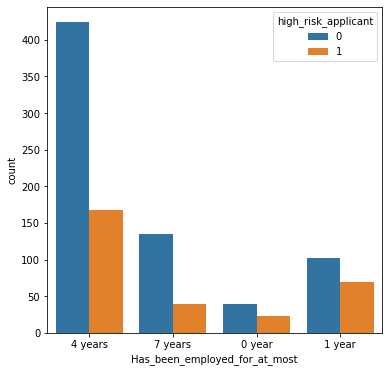

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(x='Has_been_employed_for_at_most',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Savings_account_balance', ylabel='count'>

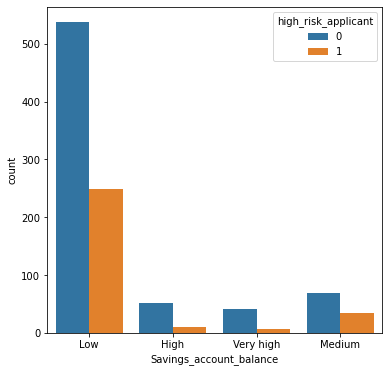

In [49]:
plt.figure(figsize=(6,6))
sns.countplot(x='Savings_account_balance',hue='high_risk_applicant',data=data)

<AxesSubplot:xlabel='Balance_in_existing_bank_account_(upper_limit_of_bucket)', ylabel='count'>

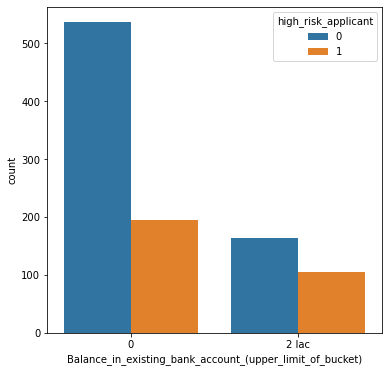

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(x='Balance_in_existing_bank_account_(upper_limit_of_bucket)',hue='high_risk_applicant',data=data)

## Segmentation based on risk factors

### From above visualization the high risk factors are:
- Gender category Male 
- Marriage category single and devorced/married/seperated 
- People with more no. of dependents 
- Own Housing and rented housing category
- People with property car or other 
- The loan purpose 'electronic equipment,FF&E,new vehicle and business'
- The duration of loan taken for 12,18,24,36,48 months
- The EMI rate % of disposal income is 4
- No. of existing loan is 1 or 2
- skilled employee/official category of employment status
- people with loan history that says existing loan paid back duly till now
- Has high co-applicant, and gurantor
- Foreign workers 
- Age category from range of 22-50
- people who have been employed for atleast 1 year and at most 4 years
- Low savings account
- People with Upper bucket of bank balance is zero


## Risk Free segments
- People with real esate property
- Loan taken for education,used vehicle, domestic appliances,repair costs has near to low risk and loan taken for carreer        development has near to zero risk
- Loan taken for less duration has low risk
- People who have existing number of loans freater than 2 are at low risk
- people who have highly qualified/unskilled/non-resident/unemployed have low risk
- People who have no loan taken/all loans paid duly are at low risk
- People with less no. of co-applicant and gurantor
- Non-foreign workers are risk free
- People who have been employes for longer duration are risk free
- People with saving bank account high/very high are risk free
- People who have devorced
- low risk with low principal loan amount


In [51]:
data.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,4 years,1,Low,0,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,Low,2 lac,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,Low,0,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,Low,0,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,Low,0,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,1


In [52]:
data.drop('applicant_id',1,inplace=True)

### Visualization of skewness

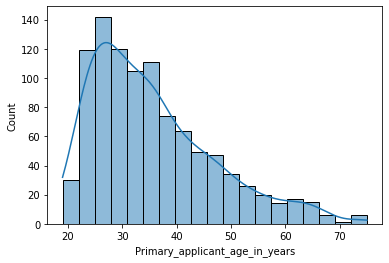

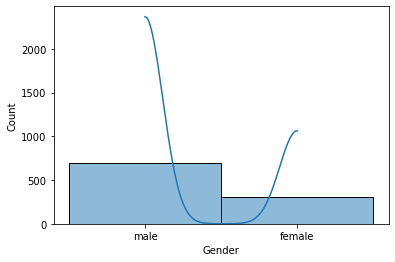

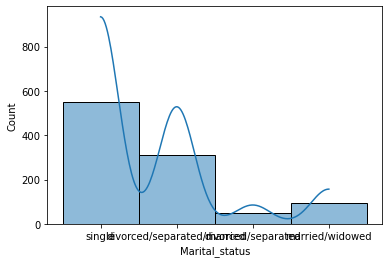

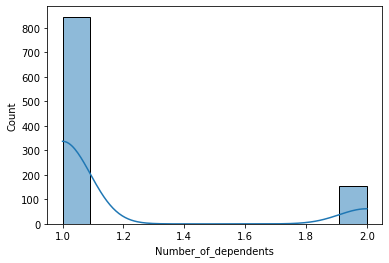

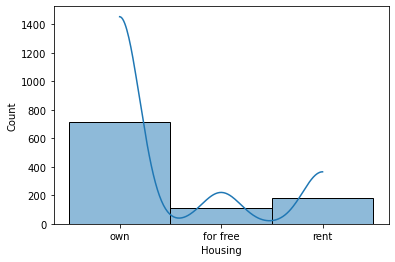

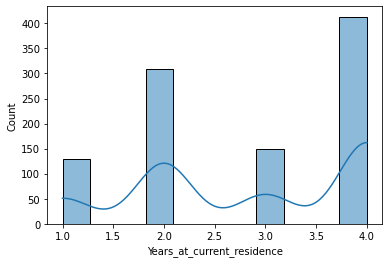

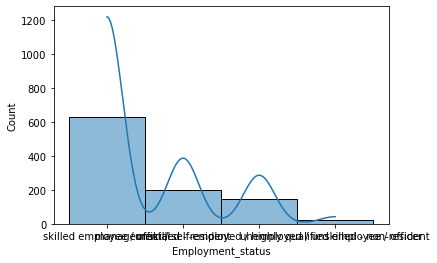

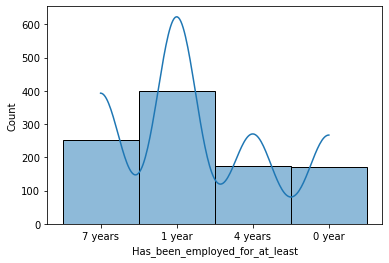

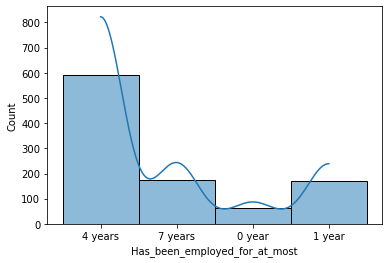

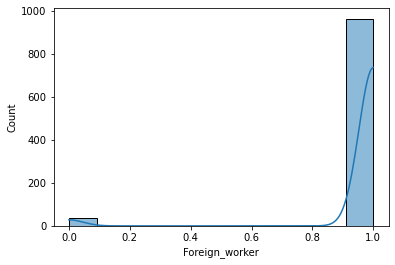

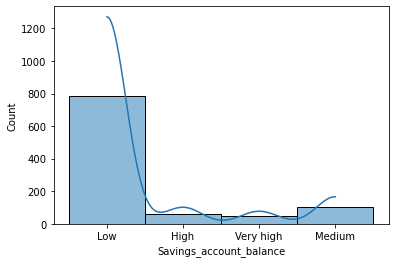

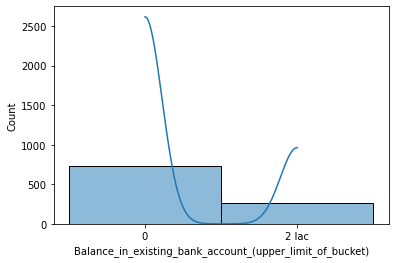

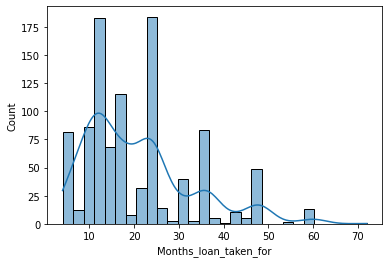

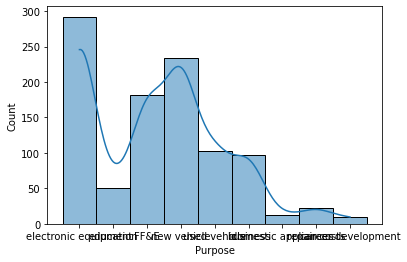

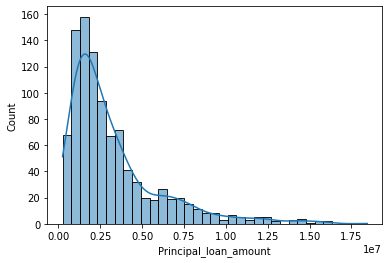

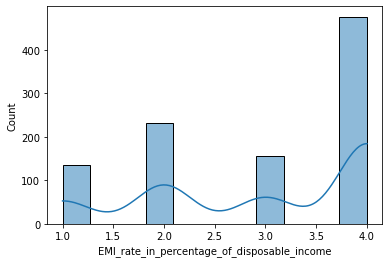

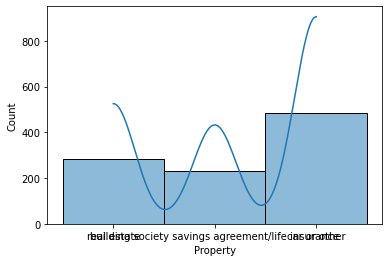

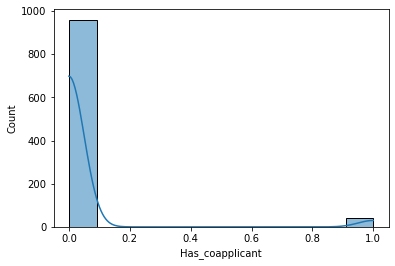

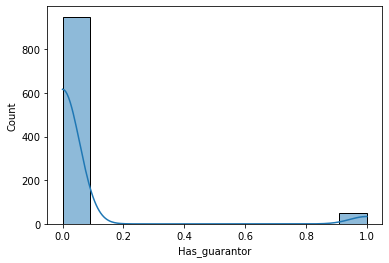

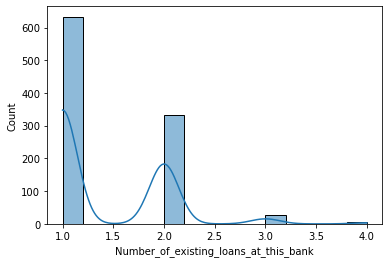

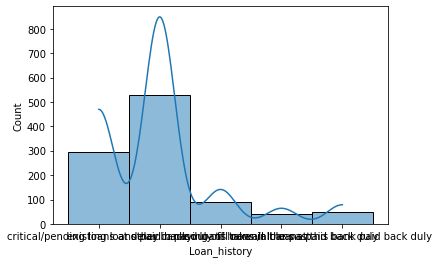

None


In [53]:
x=data.loc[:,data.columns!='high_risk_applicant']
def dist(x):
    for i in x:
        sns.histplot(x[i],kde=True)
        plt.show()
print(dist(x))

In [54]:
data.shape

(1000, 22)

### Label encoding

In [55]:
objdata = data.select_dtypes(include = "object").columns
objdata

Index(['Gender', 'Marital_status', 'Housing', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Savings_account_balance',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'Purpose',
       'Property', 'Loan_history'],
      dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataobj = data[['Gender', 'Marital_status', 'Housing', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Savings_account_balance',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'Purpose',
       'Property', 'Loan_history']].apply(le.fit_transform)

dataobj.shape

(1000, 11)

In [57]:
data.drop(['Gender', 'Marital_status', 'Housing', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Savings_account_balance',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'Purpose',
       'Property', 'Loan_history'],1,inplace=True)

In [58]:
# a=pd.concat(pd.DataFrame(data,dataobj),1)
Final_data=pd.concat([data,dataobj],axis=1)
Final_data.head()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant,Gender,Marital_status,Housing,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Savings_account_balance,Balance_in_existing_bank_account_(upper_limit_of_bucket),Purpose,Property,Loan_history
0,67,1,4,1,6,1169000,4,0,0,2,0,1,3,1,1,3,2,1,0,5,2,1
1,22,1,2,1,48,5951000,2,0,0,1,1,0,1,1,1,1,2,1,1,5,2,3
2,49,2,3,1,12,2096000,2,0,0,1,0,1,3,1,3,2,3,1,0,4,2,1
3,45,2,4,1,42,7882000,2,0,1,1,0,1,3,0,1,2,3,1,0,0,0,3
4,53,2,4,1,24,4870000,3,0,0,2,1,1,3,0,1,1,2,1,0,6,1,2


In [59]:
Final_data.shape

(1000, 22)

In [60]:
x=Final_data.drop("high_risk_applicant",1)
x.shape

(1000, 21)

### Standard scalar

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
trans_data=sc.transform(x)
trans_data.shape


(1000, 21)

### Spliiting data and model Building

In [62]:
def split(x,y):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)
#     print("Shape of x_train is:",x_train.shape,"; Shape of x_test is:" ,x_test.shape)
#     print("Shape of y_train is:",y_train.shape,"; Shape of y_test is:" ,y_test.shape)
    models={
    "LogisticRegression":LogisticRegression(random_state=1),
    "DecisionTreeClassifier":DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=5),
    "KNeighborsClassifier":KNeighborsClassifier(n_neighbors=28,p=1,n_jobs=1),
    "GaussianNB":GaussianNB(),
    "BaggingClassifier":BaggingClassifier(n_estimators=40,max_samples=30),
    "AdaBoostClassifier":AdaBoostClassifier(n_estimators=50,learning_rate=6,random_state=2),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=10,max_depth=2,random_state=1),
    "RandomForestClassifier":RandomForestClassifier(n_estimators=50,random_state=1,max_samples=28),
    "Support vector classifier":SVC(),
    "XGBClassifier":XGBClassifier()    
    }
    for name,model in models.items():
        model.fit(x_train,y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
#         confusion_matrix_of_test_data = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
#         confusion_matrix_of_train_data = pd.DataFrame(confusion_matrix(y_train, y_pred_train))

        print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
        print(name,"test score is: ",model.score(x_test,y_test))
        print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
        print(name,"train score is: ",model.score(x_train,y_train))
        print("---------------------------------------------------------------------------------")

   


x=Final_data.drop(['high_risk_applicant'],axis=1)
y=Final_data[['high_risk_applicant']]
split(x,y)

Accuracy score for test data is: 0.7133333333333334
LogisticRegression test score is:  0.7133333333333334
Accuracy score for train data is: 0.6942857142857143
LogisticRegression train score is:  0.6942857142857143
---------------------------------------------------------------------------------
Accuracy score for test data is: 0.71
DecisionTreeClassifier test score is:  0.71
Accuracy score for train data is: 0.7242857142857143
DecisionTreeClassifier train score is:  0.7242857142857143
---------------------------------------------------------------------------------
Accuracy score for test data is: 0.7166666666666667
KNeighborsClassifier test score is:  0.7166666666666667
Accuracy score for train data is: 0.71
KNeighborsClassifier train score is:  0.71
---------------------------------------------------------------------------------
Accuracy score for test data is: 0.71
GaussianNB test score is:  0.71
Accuracy score for train data is: 0.6928571428571428
GaussianNB train score is:  0.692

### Passing std scalar values to see model efficiecy change

In [63]:
def split(x,y):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)
#     print("Shape of x_train is:",x_train.shape,"; Shape of x_test is:" ,x_test.shape)
#     print("Shape of y_train is:",y_train.shape,"; Shape of y_test is:" ,y_test.shape)
    models={
    "LogisticRegression":LogisticRegression(n_jobs=10,max_iter=5,random_state=42),
    "DecisionTreeClassifier":DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=3),
    "KNeighborsClassifier":KNeighborsClassifier(n_neighbors=28,p=1,n_jobs=1),
    "GaussianNB":GaussianNB(),
    "BaggingClassifier":BaggingClassifier(n_estimators=30,max_samples=30),
    "AdaBoostClassifier":AdaBoostClassifier(n_estimators=50,learning_rate=7,random_state=2),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=10,max_depth=2,random_state=1),
    "RandomForestClassifier":RandomForestClassifier(n_estimators=50,random_state=1,max_samples=28),
    "Support vector classifier":SVC(),
    "XGBClassifier":XGBClassifier()    
    }
    for name,model in models.items():
        model.fit(x_train,y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
#         confusion_matrix_of_test_data = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
#         confusion_matrix_of_train_data = pd.DataFrame(confusion_matrix(y_train, y_pred_train))

        print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
        print(name,"test score is: ",model.score(x_test,y_test))
#         print('Confusion matrix of test data :\n',confusion_matrix_of_test_data)
        print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
        print(name,"train score is: ",model.score(x_train,y_train))
        print("---------------------------------------------------------------------------------")

   


x=trans_data
y=Final_data['high_risk_applicant']
split(x,y)

Accuracy score for test data is: 0.7166666666666667
LogisticRegression test score is:  0.7166666666666667
Accuracy score for train data is: 0.7314285714285714
LogisticRegression train score is:  0.7314285714285714
---------------------------------------------------------------------------------
Accuracy score for test data is: 0.71
DecisionTreeClassifier test score is:  0.71
Accuracy score for train data is: 0.7242857142857143
DecisionTreeClassifier train score is:  0.7242857142857143
---------------------------------------------------------------------------------
Accuracy score for test data is: 0.7133333333333334
KNeighborsClassifier test score is:  0.7133333333333334
Accuracy score for train data is: 0.7285714285714285
KNeighborsClassifier train score is:  0.7285714285714285
---------------------------------------------------------------------------------
Accuracy score for test data is: 0.6433333333333333
GaussianNB test score is:  0.6433333333333333
Accuracy score for train data 

## Key-Questions

1. Explain your intuition behind the features used for modeling.
 - Used all the features as there is no high correlation between the features
<br>
<br>
2. Are you creating new derived features? If yes explain the intuition behind them.
 - No!
<br>
<br>
3. Are there missing values? If yes how you plan to handle it.
 - some features had more than half missing values,so feature was dropped
 - Other features whose values where missing where replaced with median/mode as required
<br>
<br>
4. How categorical features are handled for modeling.
 - Used label encoding
 - We can also use one hot encoding but this increases dimensions of data.
<br>
<br>
5. Describe the features correlation using correlation matrix. Tell us about few correlated feature & share your understanding on why they are correlated.
 - There is no high corelation between features, the correlation heatmap is been plot above
<br>
<br>
6. Do you plan to drop the correlated feature? If yes then how.
 - No, in this case i did not drop any.
<br>
<br>
7. Which ML algorithm you plan to use for modeling.
 - Tried all possible ML algorithm to see which best fits and then select
<br>
<br>
8. Train two (at least) ML models to predict the credit risk & provide the confusion matrix for each model.
 - Done (Random forest and knn)
<br>
<br>
9. How you will select the hyperparameters for models trained in above step.
 - In this case i did not use hyperparamters tuning technique like grid search as the average efficiency of all models is above    70
<br>
<br> 
10. Which metric(s) you will choose to select between the set of models.
 - There are many metrics to choose best fit like accuracy,precision,F1 score, recall,ROC-AUC etc
 - I used accuracy and confusion metrics to select
 - Some other techniques are k-fold cross validation
<br>
<br>  
11. Explain how you will export the trained models & deploy it for prediction in Production
  - Before deploying; Train the model 
  - store the model in cloud
  - setup cloud storage
  - upload the exporeted model
  - upload custom code and test model with local predictions
  - deploy model after creating model resource and version

### Observations
- Data is highly skewd in terms of target feature i.e., risk factor
- Presence of features which are having null values more than half of entire data
- Sub-categories are not classified properly, overlapping classifiaction
- principal loan amount could have been in string ex: 12 lakhs etc

